# Task 5(Explanatory Data Analysis)

# Name- Sagar Sen

# Sports EDA

WHAT TO DO IN THIS ANALYSIS?
1. Performing Explanatory Data analysis on Indian Premier League
2. As a sports Analyst, find out the most successful team, players and factors contributing WIN/LOSS of a team
3. Suggest teams or players a company should endorse for its products

In [2]:
# Importing all the library necessary for this EDA
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go

In [3]:
# Reading the first file
file=pd.read_csv(r'C:\Users\Sagar Sen\Desktop\deliveries.csv')
file.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
### Reading the second file

file2=pd.read_csv(r'C:\Users\Sagar Sen\Desktop\matches.csv')
file2

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [5]:
# Cleaning some of the team names along with Venue(Stadium)

# mispelled Team names..getting it corrected
file2.team1.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)
file2.team2.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)
file2.winner.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)

# Correcting the venue names
file2.venue.replace({'Feroz Shah Kotla Ground':'Feroz Shah Kotla'},regex=True,inplace=True)
file2.venue.replace({'M Chinnaswamy Stadium':'M. Chinnaswamy Stadium'},regex=True,inplace=True)
file2.venue.replace({'MA Chidambaram Stadium, Chepauk':'M.A. Chidambaram Stadium'},regex=True,inplace=True)
file2.venue.replace({'M. A. Chidambaram Stadium':'M.A. Chidambaram Stadium'},regex=True,inplace=True)
file2.venue.replace({'Punjab Cricket Association IS Bindra Stadium, Mohali':'Punjab Cricket Association Stadium'},regex=True,inplace=True)
file2.venue.replace({'Punjab Cricket Association Stadium, Mohali':'Punjab Cricket Association Stadium'},regex=True,inplace=True)
file2.venue.replace({'IS Bindra Stadium':'Punjab Cricket Association Stadium'},regex=True,inplace=True)
file2.venue.replace({'Rajiv Gandhi International Stadium, Uppal':'Rajiv Gandhi International Stadium'},regex=True,inplace=True)
file2.venue.replace({'Rajiv Gandhi Intl. Cricket Stadium':'Rajiv Gandhi International Stadium'},regex=True,inplace=True)
                    

In [6]:
# Viewing the Cleaned data again to make sure the changes are corrected.
file2

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,Rajiv Gandhi International Stadium,AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M. Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M.A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [14]:
# Lets Explore the best batsman from 2008 to 2019 
players_best=file.groupby('batsman').apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='Runs')
batting_sorted=players_best.sort_values(by='Runs',ascending=False) 
top_batsman=batting_sorted[:5] 
print('Top 5 batsman in the tournament are:',top_batsman)
fig = px.bar(top_batsman, x='batsman', y='Runs',
             hover_data=['batsman'], color='Runs',title='Top 5 Batsmen in IPL- Seasons 2008-2019')
fig.show()

Top 5 batsman in the tournament are:        batsman  Runs
486    V Kohli  5434
428   SK Raina  5415
367  RG Sharma  4914
112  DA Warner  4741
392   S Dhawan  4632


In [8]:
# Exploring out the highest wicket taker in IPL from 2008 to 2019

bowling_wickets=file[file['dismissal_kind']!='run out']
bowling_tot=bowling_wickets.groupby('bowler').apply(lambda x:x['dismissal_kind'].dropna()).reset_index(name='Wickets')
bowling_wick_count=bowling_tot.groupby('bowler').count().reset_index()
bowling_top=bowling_wick_count.sort_values(by='Wickets',ascending=False)
top_bowlers=bowling_top.loc[:,['bowler','Wickets']][0:5]
print('The Top Wicket Takers in the Tournament are:\n',top_bowlers)
fig=px.bar(top_bowlers,x='bowler',y='Wickets',
          hover_data=['bowler'],color='Wickets',title='Top 5 Bowlers in IPL from 2008-2019')
fig.show()

The Top Wicket Takers in the Tournament are:
               bowler  Wickets
290       SL Malinga      170
6           A Mishra      156
110  Harbhajan Singh      150
227        PP Chawla      149
82          DJ Bravo      147


Top 10 Cities with maximum no. of Matches Played:
           city  Match Counts
23      Mumbai           101
21     Kolkata            77
10       Delhi            74
2    Bangalore            66
14   Hyderabad            64
8      Chennai            57
16      Jaipur            47
7   Chandigarh            46
26        Pune            38
12      Durban            15


Text(0.5, 1.0, 'Top 10 Cities that have hosted IPL matches')

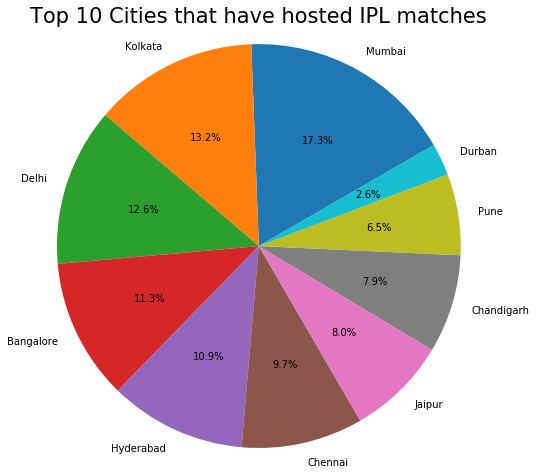

In [9]:
# Checking where most IPL matches are played!

city_counts=file2.groupby('city').apply(lambda x:x['city'].count()).reset_index(name='Match Counts')
top_cities_order=city_counts.sort_values(by='Match Counts',ascending=False)
top_cities=top_cities_order[:10]
print('Top 10 Cities with maximum no. of Matches Played:\n',top_cities)
plt.figure(figsize=(8,8))
plt.pie(top_cities['Match Counts'],labels=top_cities['city'],autopct='%1.1f%%',startangle=30)
plt.axis('equal')
plt.title('Top 10 Cities that have hosted IPL matches',size=21)

Text(0.5, 1, 'The Toss Decisions taken by Venue Heatmap-in IPL')

<Figure size 432x288 with 0 Axes>

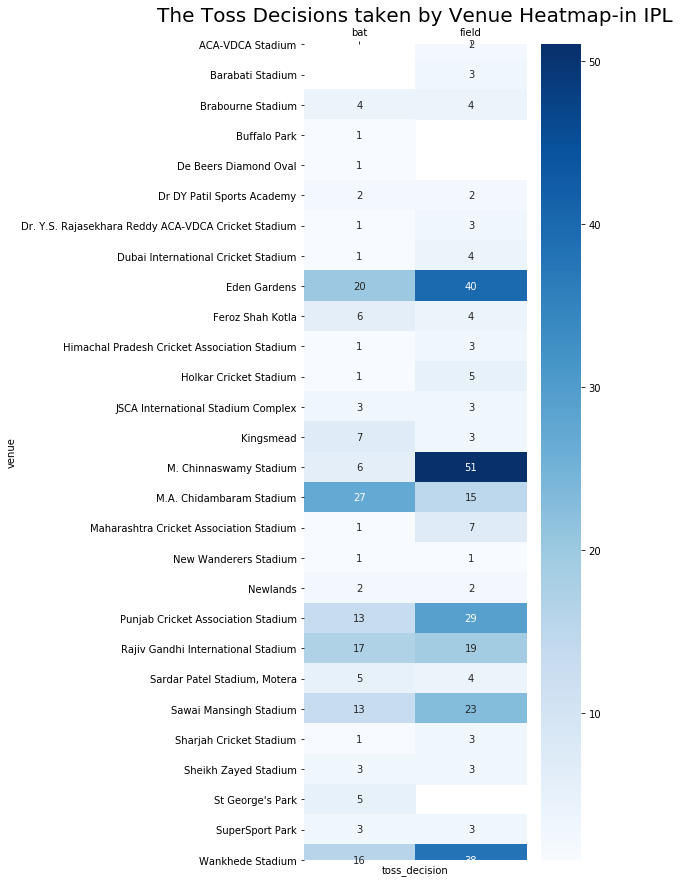

In [10]:
# Visualizing the Toss  with respect to VENUE in a HEATMAP 

Current_teams=['Chennai Super Kings','Mumbai Indians','Rajasthan Royals','Delhi Capitals','Sunrisers Hyderabad','Kolkata Knight Riders','Royal Challengers Bangalore','Kings XI Punjab']
team_1_filter=file2[file2.team1.isin(Current_teams)]
team_2_filter=team_1_filter[team_1_filter.team2.isin(Current_teams)]
teams_filter=team_2_filter[team_2_filter.winner.isin(Current_teams)]
head_to_head_matches=teams_filter.groupby(['team1','team2','winner']).apply(lambda x:x['winner'].count()).reset_index(name='Winning Counts')
venue_toss=teams_filter.groupby(['venue','toss_decision']).apply(lambda x:x['toss_decision'].count()).reset_index(name='Toss Decision Counts')
heatmap2_data = pd.pivot_table(venue_toss, values='Toss Decision Counts', index=['venue'],  columns='toss_decision')
fig = plt.figure()
fig, ax = plt.subplots(1,1, figsize=(5,15))
g=sns.heatmap(heatmap2_data,annot=True, cmap="Blues",fmt='g')
g.xaxis.set_ticks_position("top")
ax.set_title('The Toss Decisions taken by Venue Heatmap-in IPL',size=20)


In [11]:
# How does Toss effect the win/loss of a match

venue_toss_result=teams_filter.groupby(['venue','toss_decision']).apply(lambda x:np.sum(np.where(x['toss_winner']==x['winner'],1,0))).reset_index(name='Toss Winner Wins Match')
merged_venue_data=pd.merge(venue_toss_result,venue_toss,how='inner',
                           left_on=['venue','toss_decision'],right_on=['venue','toss_decision'])
merged_venue_data['Toss Winner Lose Match']=merged_venue_data['Toss Decision Counts']-merged_venue_data['Toss Winner Wins Match']
merged_data_arranged=merged_venue_data.loc[:,['venue','toss_decision','Toss Decision Counts',
                                              'Toss Winner Wins Match','Toss Winner Lose Match']]
merged_data_arranged


,venue,toss_decision,Toss Decision Counts,Toss Winner Wins Match,Toss Winner Lose Match
0,ACA-VDCA Stadium,field,2,2,0
1,Barabati Stadium,field,3,2,1
2,Brabourne Stadium,bat,4,2,2
3,Brabourne Stadium,field,4,3,1
4,Buffalo Park,bat,1,1,0
5,De Beers Diamond Oval,bat,1,0,1
6,Dr DY Patil Sports Academy,bat,2,2,0
7,Dr DY Patil Sports Academy,field,2,2,0
8,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,bat,1,0,1
9,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,field,3,1,2


THE ABOVE SHOWS THAT TEAMS WHO WON THE TOSS WON MOST MATCHES..but...THIS IS NOT A GOOD WAY TO SAY THINGS.. 
LET'S VISUALIZE IT USING HEATMAPS TO SHOW MORE ABOUT WIN/LOSS 

Text(68.99999999999999, 0.5, 'Stadium')

<Figure size 432x288 with 0 Axes>

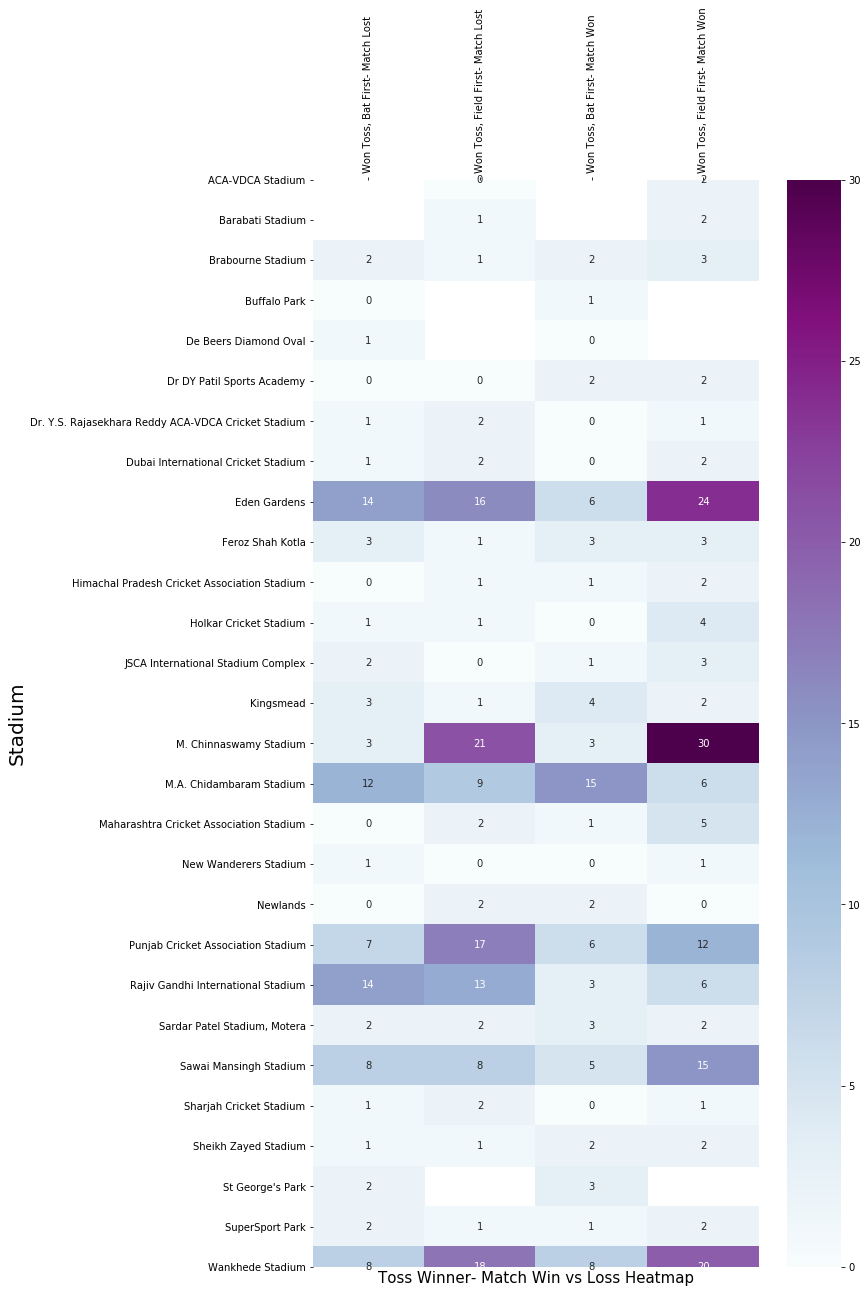

In [12]:
# The below code shows Toss as a factor to determine WIN/Loss W.R.T Venues(Stadium)
heatmap3_data = pd.pivot_table(merged_venue_data, values=['Toss Winner Wins Match','Toss Winner Lose Match'], 
                     index=['venue'], 
                     columns='toss_decision')
fig=plt.figure()
fig,ax1=plt.subplots(1,1,figsize=(10,20))
g=sns.heatmap(heatmap3_data,annot=True,cmap='BuPu',fmt='g')
g.xaxis.set_ticks_position("top")
g.set_xticklabels(['Won Toss, Bat First- Match Lost','Won Toss, Field First- Match Lost','Won Toss, Bat First- Match Won','Won Toss, Field First- Match Won'],rotation=90)
g.set_xlabel('Toss Winner- Match Win vs Loss Heatmap',size=15)
g.set_ylabel('Stadium',size=20)

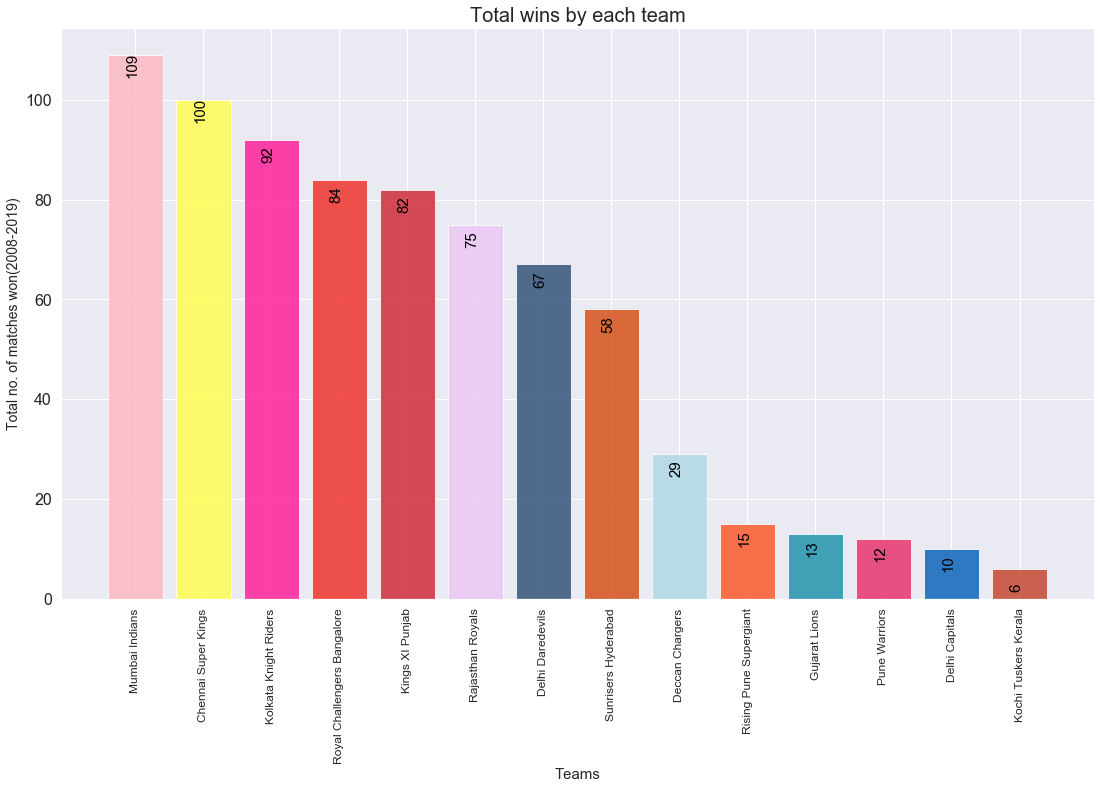

In [13]:
# Which Team have won many Trophies throughout the Tournament(Visualizing)

sns.set(style='darkgrid')
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
wins=pd.DataFrame(file2['winner'].value_counts())
wins['name']=wins.index
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=16)
plt.bar(wins['name'],
        wins['winner'],
        color=['#FFB6C1','#FFFF48','#FF1493','#EF2920','#CD202D','#ECC5F2',
               '#294A73','#D4480B','#ADD8E6','#FD511F','#158EA6','#E82865',
               '#005DB7','#C23E25','#E82865']
        ,alpha=0.8)
count=0
for i in wins['winner']:
    plt.text(count-0.15,i-4,str(i),size=15,color='black',rotation=90)
    count+=1
plt.title('Total wins by each team',fontsize=20)
plt.xlabel('Teams',fontsize=15)
plt.ylabel('Total no. of matches won(2008-2019)',fontsize=14)
plt.show()

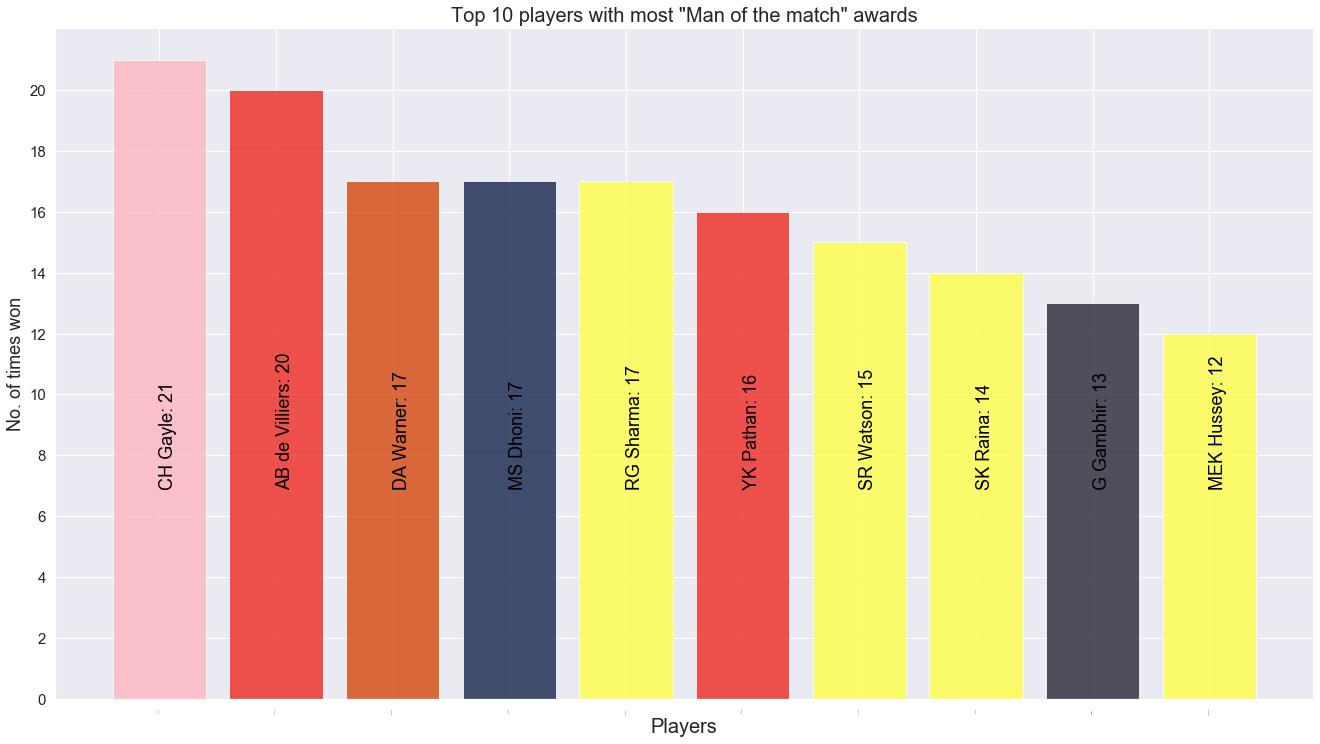

In [119]:
# Finding out Man of the Matches each player scored from top to bottom

mom=pd.DataFrame(file2['player_of_match'].value_counts())
mom['name']=mom.index
mom=players.head(10)
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
plt.xticks(rotation=90,fontsize=0)
plt.yticks([0,2,4,6,8,10,12,14,16,18,20],[0,2,4,6,8,10,12,14,16,18,20],fontsize=15)
plt.bar(players['name'], players['player_of_match'],
        color=['#FFB6C1','#EF2920','#D4480B','#15244C','#FFFF48','#EF2920',
               '#FFFF48','#FFFF48','#292734','#FFFF48'],alpha=0.8)
count=0
for i in mom['player_of_match']:
    plt.text(count,7,mom['name'][count]+': '+str(i),rotation=90,color='black',size=18)
    count+=1
plt.title('Top 10 players with most "Man of the match" awards',fontsize=20)
plt.xlabel('Players',fontsize=20)
plt.ylabel('No. of times won',fontsize=18)
plt.tight_layout()
plt.show()

CONCLUSION:
For endorment of product there might be many factor. Depending on teams, players one can reach out to them.
BEST PICK would be=
1. Mumbai Indians(109 wins) or Chennai Super Kings(100 wins) would be good choice to endore for products as they have good Winrate amongst others.
2. If bowler was considered Malinga or A. Mishra with most of the wickets taken
3. If batsmen was considered then V. Kohli or S.K. Raina with most runs in the tournament 

    Please note that the endorsement for any product is biased and people will have different opinion.



# Thank You